## TD法

In [1]:
import numpy as np
import random

# TD(0)アルゴリズムの実装
def td_zero(maze, start, end, alpha, gamma, episodes):
    # 状態価値関数Vの初期化
    V = np.zeros(maze.shape)

    # 指定されたエピソード数だけ繰り返し学習
    for _ in range(episodes):
        state = start  # エピソードの開始状態を設定
        while state != end:  # ゴールに到達するまでループ
            next_state = get_next_state(maze, state, end)  # 次の状態を取得
            reward = get_reward(maze, next_state, end)  # 次の状態での報酬を取得
            # TD(0)による価値関数の更新
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state  # 次の状態に遷移
    return V

# 現在の状態から可能な次の状態を取得する関数
def get_possible_next_states(maze, state):
    x, y = state
    possible_states = []
    # 迷路の境界内で上、下、左、右に移動可能な状態を追加
    if x > 0:
        possible_states.append((x - 1, y))
    if x < maze.shape[0] - 1:
        possible_states.append((x + 1, y))
    if y > 0:
        possible_states.append((x, y - 1))
    if y < maze.shape[1] - 1:
        possible_states.append((x, y + 1))
    return possible_states

# 次の状態をランダムに選択する関数
def get_next_state(maze, state, end):
    return random.choice(get_possible_next_states(maze, state))

# 状態に応じた報酬を返す関数
def get_reward(maze, state, end):
    if state == end:  # ゴールに到達したら報酬1
        return 1
    else:  # それ以外の状態では報酬-0.01
        return -0.01

# 例の迷路設定
maze = np.zeros((5, 5))  # 5x5の迷路を定義
start = (0, 0)  # 開始位置
end = (4, 4)  # ゴール位置

# TD(0)アルゴリズムを実行し、状態価値関数Vを計算
V = td_zero(maze, start, end, alpha=0.1, gamma=0.9, episodes=1000)

# 結果の表示
print(V)

[[-0.05287932 -0.04758376 -0.02960208 -0.0027844   0.00871811]
 [-0.04819973 -0.03907045 -0.01005786  0.03529991  0.05876346]
 [-0.03366274 -0.01364479  0.0300108   0.1697689   0.25776818]
 [-0.01461317  0.02286217  0.11662339  0.33593099  0.61159595]
 [-0.00416444  0.04110836  0.18828308  0.54663095  0.        ]]


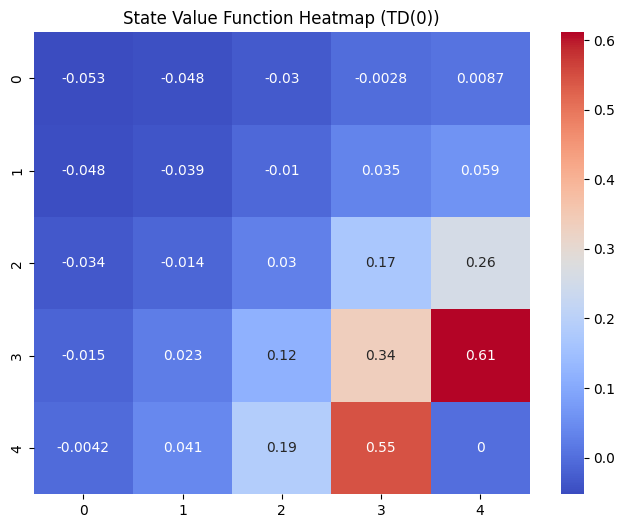

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 結果をヒートマップとして表示
plt.figure(figsize=(8, 6))  # プロットのサイズを設定
sns.heatmap(V, annot=True, cmap='coolwarm', cbar=True)  # ヒートマップを作成
plt.title("State Value Function Heatmap (TD(0))")  # タイトルを設定
plt.show()  # ヒートマップを表示

## SARSAアルゴリズム

In [4]:
import numpy as np

def sarsa(maze, start, end, alpha, gamma, epsilon, episodes):
    Q = np.zeros((*maze.shape, 4))  # 4つの行動（上、下、左、右）を考慮
    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def choose_action(state):
        if np.random.rand() < epsilon:
            return np.random.choice(4)  # ランダムに行動を選択
        else:
            return np.argmax(Q[state])

    def is_valid_state(state):
        x, y = state
        return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

    for _ in range(episodes):
        state = start
        action = choose_action(state)
        while state != end:
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])

            # 境界外への移動を避ける
            if not is_valid_state(next_state):
                next_state = state

            reward = get_reward(maze, next_state, end)
            next_action = choose_action(next_state)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state, action = next_state, next_action

            # 終了状態に到達したらエピソードを終了
            if state == end:
                break

    return Q

def get_reward(maze, state, end):
    if state == end:
        return 1
    else:
        return -0.01

# 例の迷路設定
maze = np.zeros((5, 5))
start = (0, 0)
end = (4, 4)
Q = sarsa(maze, start, end, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000)
print(Q)

[[[ 0.24798318  0.25365491  0.34345604  0.24627141]
  [ 0.05239115  0.01478596  0.39553368  0.02865561]
  [-0.00123387  0.01987412  0.37988423 -0.01030667]
  [-0.00628398 -0.00635843  0.14505793 -0.00581382]
  [-0.00560755 -0.00402714 -0.00540073 -0.00590699]]

 [[ 0.39551314  0.2728393   0.17129337  0.22770494]
  [ 0.44333276  0.28947992  0.41836342  0.27339118]
  [ 0.44479505  0.35105738  0.54757058  0.17208432]
  [-0.0046016  -0.00408664  0.64247981 -0.00106287]
  [-0.003772   -0.00304373  0.06339814 -0.00305102]]

 [[ 0.33006607  0.01507016 -0.0102916   0.02206144]
  [ 0.5442228   0.01997353  0.01586225  0.09855877]
  [ 0.62903482  0.41327053  0.45018725  0.37282941]
  [ 0.33717705  0.41181183  0.77935808  0.45657761]
  [ 0.05267263 -0.00199     0.73930961 -0.00204892]]

 [[-0.00571033 -0.0063929  -0.00629185 -0.00662301]
  [ 0.1628665  -0.004199   -0.00431292 -0.00415013]
  [ 0.73755879 -0.00199     0.28237475 -0.00225692]
  [ 0.77369799  0.52194486  0.88599236  0.52490675]
  [ 0.

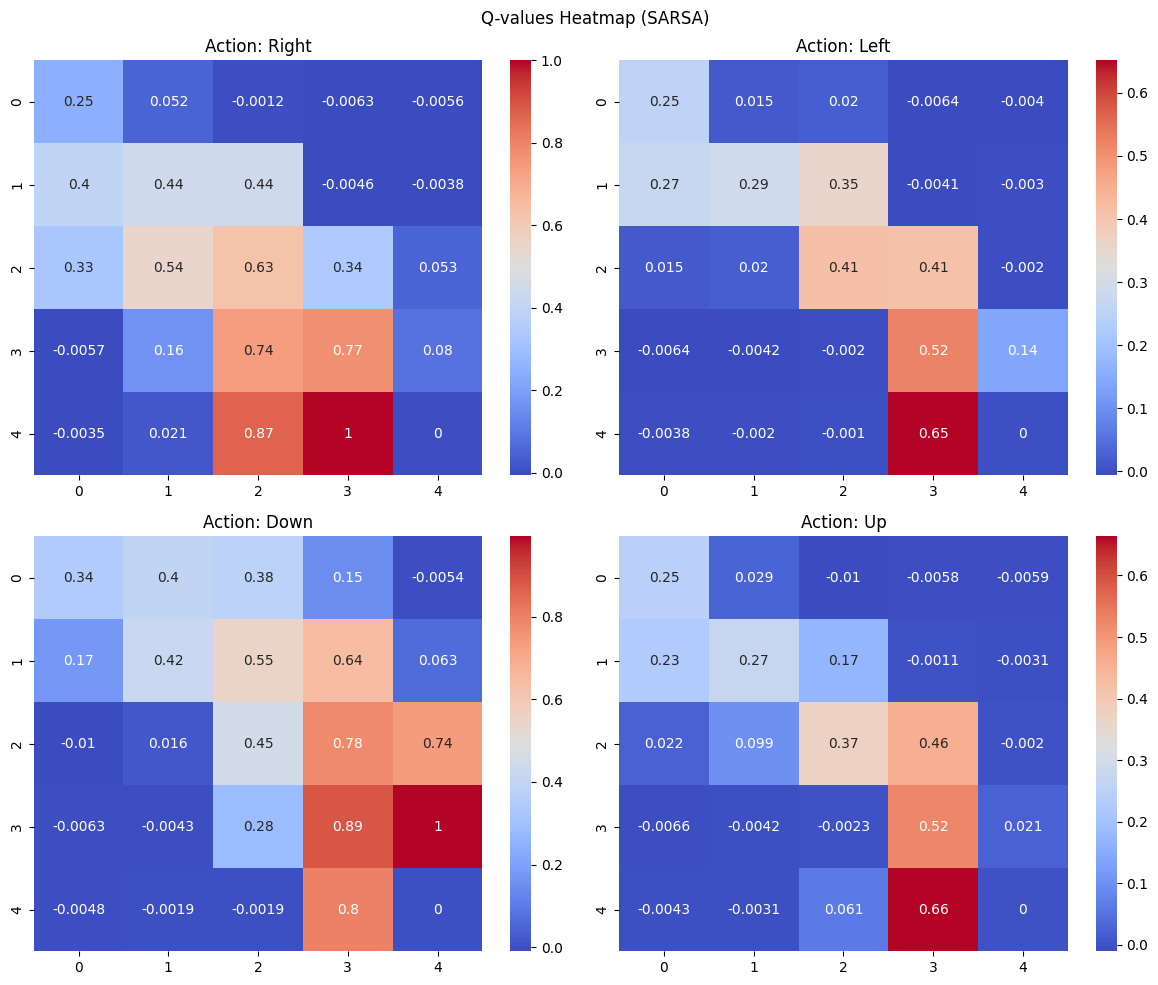

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# SARSAの結果のヒートマップ表示
def plot_q_values(Q, title="Q-values Heatmap (SARSA)"):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    actions = ['Right', 'Left', 'Down', 'Up']
    for i, ax in enumerate(axes.flat):
        sns.heatmap(Q[:, :, i], annot=True, cmap='coolwarm', cbar=True, ax=ax)
        ax.set_title(f"Action: {actions[i]}")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Q値のヒートマップ表示
plot_q_values(Q)


## DQN

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models

# 環境の設定（例として）
maze = np.zeros((5, 5))
start = (0, 0)
end = (4, 4)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# DQNのモデル構築
def build_model(input_shape, num_actions):
    model = models.Sequential()
    model.add(layers.Dense(24, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(num_actions, activation='linear'))
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# 経験リプレイバッファ
class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = []
        self.max_size = max_size

    def add(self, experience):
        if len(self.buffer) >= self.max_size:
            self.buffer.pop(0)
        self.buffer.append(experience)

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

# 学習の設定
num_actions = len(actions)
input_shape = (25,)
model = build_model(input_shape, num_actions)
target_model = build_model(input_shape, num_actions)
replay_buffer = ReplayBuffer(max_size=2000)

def get_state(maze, state):
    # 迷路の状態をコピーし、エージェントの位置を1として設定
    state_representation = maze.copy()
    state_representation[state] = 1
    return state_representation.flatten().reshape(1, -1)

def choose_action(state, epsilon):
    # ε-グリーディー法による行動選択
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)  # ランダムに行動を選択
    else:
        q_values = model.predict(state)
        return np.argmax(q_values[0])  # Q値が最大の行動を選択

def is_valid_state(state):
    # 次状態が迷路の境界内にあるかどうかをチェック
    x, y = state
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

# DQNの学習
def train_dqn(episodes, gamma, epsilon, epsilon_decay, batch_size, target_update_freq):
    for episode in range(episodes):
        state = start
        total_reward = 0
        while state != end:
            state_input = get_state(maze, state)
            action_index = choose_action(state_input, epsilon)
            action = actions[action_index]
            next_state = (state[0] + action[0], state[1] + action[1])

            # 境界外への移動を防ぐためのチェック
            if not is_valid_state(next_state):
                next_state = state

            reward = 1 if next_state == end else -0.01
            total_reward += reward
            replay_buffer.add((state, action_index, reward, next_state))

            if len(replay_buffer.buffer) >= batch_size:
                minibatch = replay_buffer.sample(batch_size)
                states, actions2, rewards, next_states = zip(*minibatch)
                state_inputs = np.vstack([get_state(maze, s) for s in states])
                next_state_inputs = np.vstack([get_state(maze, s) for s in next_states])

                targets = model.predict(state_inputs)
                next_q_values = target_model.predict(next_state_inputs)

                for i in range(batch_size):
                    targets[i][actions2[i]] = rewards[i] + gamma * np.max(next_q_values[i])

                model.train_on_batch(state_inputs, targets)

            state = next_state

        epsilon = max(epsilon * epsilon_decay, 0.01)  # εを減衰させる

        # ターゲットモデルの更新
        if episode % target_update_freq == 0:
            target_model.set_weights(model.get_weights())

        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# DQNの実行
train_dqn(episodes=100, gamma=0.95, epsilon=1.0, epsilon_decay=0.995, batch_size=32, target_update_freq=10)